In [ ]:
! pip install qiskit qiskit-ibm-runtime rustworkx scipy typing

# Import statements

In [1]:
import rustworkx as rx
from rustworkx.visualization import mpl_draw as draw_graph
import numpy as np
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import QAOAAnsatz
#from qiskit_ibm_runtime.fake_provider import FakeKyiv
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator, QiskitRuntimeService
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel
from typing import Sequence

# Creating or Loading graphs

## Creating 5 Nodes graph

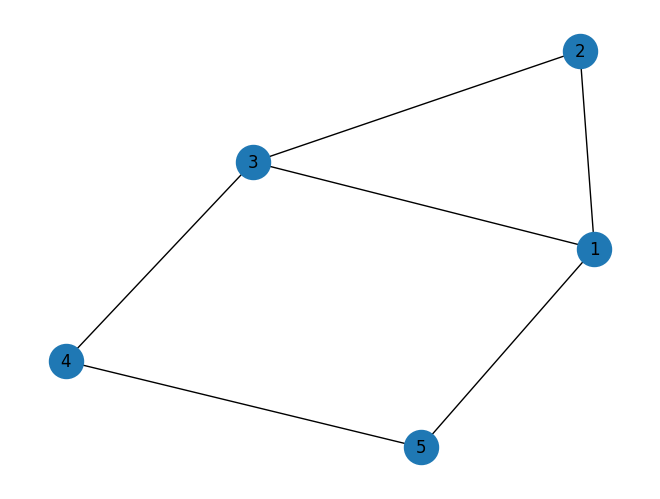

In [9]:
n = 5
graph5 = rx.PyGraph()
graph5.add_nodes_from(np.arange(0, n+1, 1));graph5.remove_node(0)
graph5_edges = [(1, 2, 1.0), (1, 3, 1.0), (1, 5, 1.0), (2, 3, 1.0), (3, 4, 1.0), (4, 5, 1.0)]
graph5.add_edges_from(graph5_edges)
draw_graph(graph5, node_size=600, with_labels=True)

## Creating 10 Nodes graph

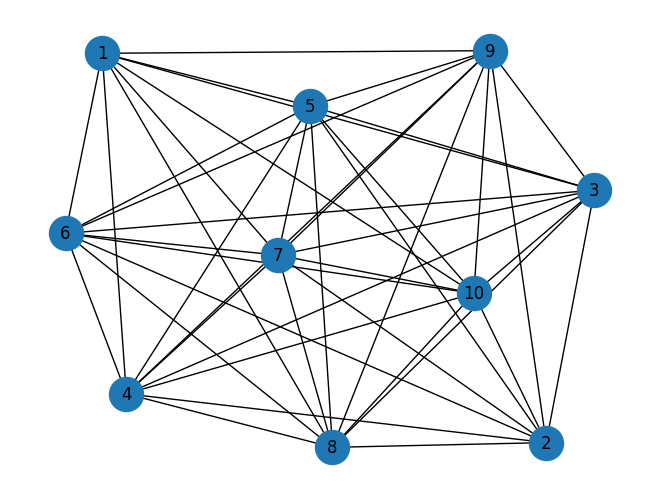

In [6]:
n = 10
graph10_edges = [(1,3,1.0), (1,4,1.0), (1,5,1.0), (1,6,1.0), (1,7,1.0), (1,8,1.0), (1,9,1.0), (1,10,1.0), (2,3,1.0), (2,4,1.0), (2,5,1.0), (2,6,1.0), (2,7,1.0), (2,8,1.0), (2,9,1.0), (2,10,1.0), (3,4,1.0), (3,5,1.0), (3,6,1.0), (3,7,1.0), (3,8,1.0), (3,9,1.0), (3,10,1.0), (4,5,1.0), (4,6,1.0), (4,7,1.0), (4,8,1.0), (4,9,1.0), (4,10,1.0), (5,6,1.0), (5,7,1.0), (5,8,1.0), (5,9,1.0), (5,10,1.0), (6,7,1.0), (6,8,1.0), (6,9,1.0), (6,10,1.0), (7,8,1.0), (7,9,1.0), (7,10,1.0), (8,9,1.0), (8,10,1.0), (9,10,1.0)]
graph10 = rx.PyGraph()
graph10.add_nodes_from(np.arange(0, n+1, 1));graph10.remove_node(0)
graph10.add_edges_from(graph10_edges)
draw_graph(graph10, node_size=600, with_labels=True)

## Creating 15 Nodes graph

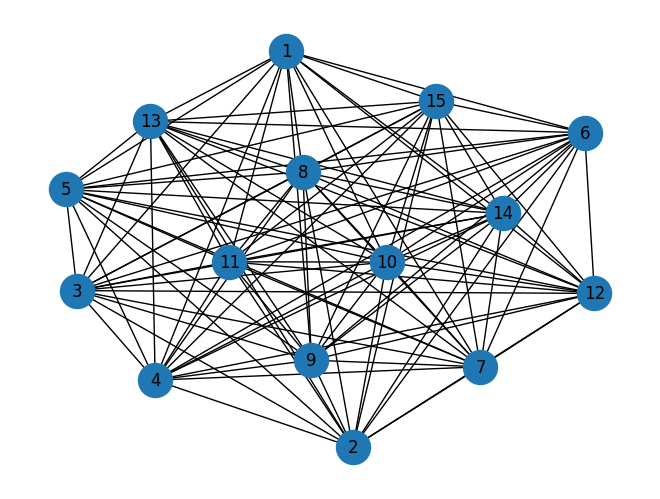

In [2]:
n = 15
graph15_edges = [(1,3,1.0), (1,4,1.0), (1,5,1.0), (1,6,1.0), (1,7,1.0), (1,8,1.0), (1,9,1.0), (1,10,1.0), (1,11,1.0), (1,12,1.0), (1,13,1.0), (1,14,1.0), (1,15,1.0), (2,3,1.0), (2,4,1.0), (2,5,1.0), (2,6,1.0), (2,7,1.0), (2,8,1.0), (2,9,1.0), (2,10,1.0), (2,11,1.0), (2,12,1.0), (2,13,1.0), (2,14,1.0), (2,15,1.0), (3,4,1.0), (3,5,1.0), (3,6,1.0), (3,7,1.0), (3,8,1.0), (3,9,1.0), (3,10,1.0), (3,11,1.0), (3,12,1.0), (3,13,1.0), (3,14,1.0), (3,15,1.0), (4,5,1.0), (4,6,1.0), (4,7,1.0), (4,8,1.0), (4,9,1.0), (4,10,1.0), (4,11,1.0), (4,12,1.0), (4,13,1.0), (4,14,1.0), (4,15,1.0), (5,6,1.0), (5,7,1.0), (5,8,1.0), (5,9,1.0), (5,10,1.0), (5,11,1.0), (5,12,1.0), (5,13,1.0), (5,14,1.0), (5,15,1.0), (6,7,1.0), (6,8,1.0), (6,9,1.0), (6,10,1.0), (6,11,1.0), (6,12,1.0), (6,13,1.0), (6,14,1.0), (6,15,1.0), (7,8,1.0), (7,9,1.0), (7,10,1.0), (7,11,1.0), (7,12,1.0), (7,13,1.0), (7,14,1.0), (7,15,1.0), (8,9,1.0), (8,10,1.0), (8,11,1.0), (8,12,1.0), (8,13,1.0), (8,14,1.0), (8,15,1.0), (9,10,1.0), (9,11,1.0), (9,12,1.0), (9,13,1.0), (9,14,1.0), (9,15,1.0), (10,11,1.0), (10,12,1.0), (10,13,1.0), (10,14,1.0), (10,15,1.0), (11,12,1.0), (11,13,1.0), (11,14,1.0), (11,15,1.0), (12,13,1.0), (12,14,1.0), (12,15,1.0), (13,14,1.0), (13,15,1.0), (14,15,1.0)]
graph15 = rx.PyGraph()
graph15.add_nodes_from(np.arange(0, n+1, 1));graph15.remove_node(0)
graph15.add_edges_from(graph15_edges)
draw_graph(graph15, node_size=600, with_labels=True)

## Loading the Zachary Karate Club Dataset

In [2]:
zachary_graph = []
with open("zachary_soc.txt","r") as f1:
    for s in f1:
        s = s.strip().split()
        zachary_graph.append((int(s[0]),int(s[1]),1.0))

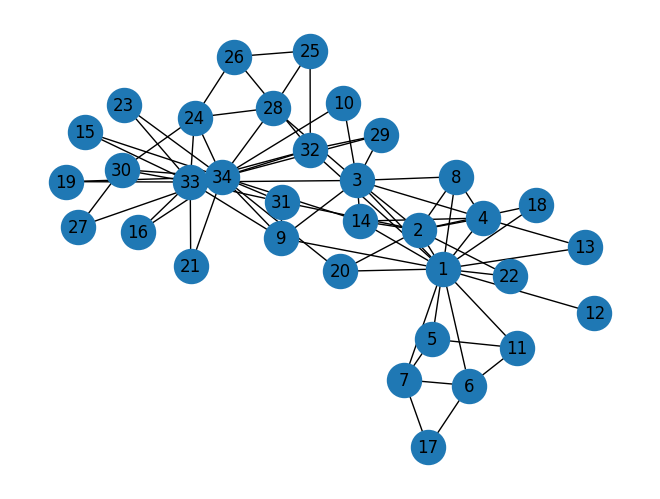

In [3]:
n = 34
zac_graph = rx.PyGraph(); 
zac_graph.add_nodes_from(np.arange(0, n+1, 1));zac_graph.remove_node(0)
zac_graph.add_edges_from(zachary_graph)
draw_graph(zac_graph, node_size=600, with_labels=True)

# Bruteforce solution to graph's Max-cut

In [12]:
import itertools

def max_cut_bruteforce(G):
    """
    Brute-force search for the maximum cut of a graph.
    
    Parameters:
        G (networkx.Graph): The input graph.

    Returns:
        best_cut (tuple): The optimal partition (S, T) that maximizes the cut.
        max_cut_size (int): The size of the maximum cut.
    """
    nodes = list(G.node_indexes())
    n = len(nodes)
    edges = list(G.edge_list())
    
    max_cut_size = 0
    best_cut = None

    # Iterate over all possible subsets S (2^n possibilities)
    for bits in itertools.product([0, 1], repeat=n):
        # Compute cut size: count edges between S and T
        cut_size = 0
        for u,v in  edges:
            cut_size += bits[u-1]+bits[v-1]-2*bits[u-1]*bits[v-1]
        
        if cut_size > max_cut_size:
            max_cut_size = cut_size
            best_cut = bits
    
    return {"Cut Value":max_cut_size,"Node Partition":best_cut}

In [13]:
%%time
max_cut_bruteforce(graph5)

CPU times: user 30 μs, sys: 4 μs, total: 34 μs
Wall time: 34.3 μs


{'Cut Value': 5, 'Node Partition': (0, 0, 1, 0, 1)}

In [14]:
%%time
max_cut_bruteforce(graph10)

CPU times: user 3.09 ms, sys: 3 μs, total: 3.09 ms
Wall time: 3.1 ms


{'Cut Value': 25, 'Node Partition': (0, 0, 0, 0, 0, 1, 1, 1, 1, 1)}

In [15]:
%%time
max_cut_bruteforce(graph15)

CPU times: user 225 ms, sys: 0 ns, total: 225 ms
Wall time: 224 ms


{'Cut Value': 56,
 'Node Partition': (0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1)}

# QAOA for Max-Cut

## Preparing Cost Hamiltonian

In [3]:
def build_max_cut_paulis(graph: rx.PyGraph) -> list[tuple[str, float]]:
    """Convert the graph to Pauli list.

    This function does the inverse of `build_max_cut_graph`
    """
    pauli_list = []
    for edge in list(graph.edge_list()):
        paulis = ["I"] * len(graph)
        paulis[edge[0]-1], paulis[edge[1]-1] = "Z", "Z"

        weight = graph.get_edge_data(edge[0], edge[1])

        pauli_list.append(("".join(paulis)[::-1], weight))

    return pauli_list

In [17]:
max_cut_paulis5 = build_max_cut_paulis(graph5)
cost_hamiltonian5 = SparsePauliOp.from_list(max_cut_paulis5)
print("Cost Function Hamiltonian of 5 Nodes graph:", cost_hamiltonian5)

Cost Function Hamiltonian of 5 Nodes graph: SparsePauliOp(['IIIZZ', 'IIZIZ', 'ZIIIZ', 'IIZZI', 'IZZII', 'ZZIII'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])


In [18]:
max_cut_paulis10 = build_max_cut_paulis(graph10)
cost_hamiltonian10 = SparsePauliOp.from_list(max_cut_paulis10)
print("Cost Function Hamiltonian of 10 Nodes graph:", cost_hamiltonian10)

Cost Function Hamiltonian of 10 Nodes graph: SparsePauliOp(['IIIIIIIZIZ', 'IIIIIIZIIZ', 'IIIIIZIIIZ', 'IIIIZIIIIZ', 'IIIZIIIIIZ', 'IIZIIIIIIZ', 'IZIIIIIIIZ', 'ZIIIIIIIIZ', 'IIIIIIIZZI', 'IIIIIIZIZI', 'IIIIIZIIZI', 'IIIIZIIIZI', 'IIIZIIIIZI', 'IIZIIIIIZI', 'IZIIIIIIZI', 'ZIIIIIIIZI', 'IIIIIIZZII', 'IIIIIZIZII', 'IIIIZIIZII', 'IIIZIIIZII', 'IIZIIIIZII', 'IZIIIIIZII', 'ZIIIIIIZII', 'IIIIIZZIII', 'IIIIZIZIII', 'IIIZIIZIII', 'IIZIIIZIII', 'IZIIIIZIII', 'ZIIIIIZIII', 'IIIIZZIIII', 'IIIZIZIIII', 'IIZIIZIIII', 'IZIIIZIIII', 'ZIIIIZIIII', 'IIIZZIIIII', 'IIZIZIIIII', 'IZIIZIIIII', 'ZIIIZIIIII', 'IIZZIIIIII', 'IZIZIIIIII', 'ZIIZIIIIII', 'IZZIIIIIII', 'ZIZIIIIIII', 'ZZIIIIIIII'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1

In [4]:
max_cut_paulis15 = build_max_cut_paulis(graph15)
cost_hamiltonian15 = SparsePauliOp.from_list(max_cut_paulis15)
print("Cost Function Hamiltonian of 15 Nodes graph:", cost_hamiltonian15)

Cost Function Hamiltonian of 15 Nodes graph: SparsePauliOp(['IIIIIIIIIIIIZIZ', 'IIIIIIIIIIIZIIZ', 'IIIIIIIIIIZIIIZ', 'IIIIIIIIIZIIIIZ', 'IIIIIIIIZIIIIIZ', 'IIIIIIIZIIIIIIZ', 'IIIIIIZIIIIIIIZ', 'IIIIIZIIIIIIIIZ', 'IIIIZIIIIIIIIIZ', 'IIIZIIIIIIIIIIZ', 'IIZIIIIIIIIIIIZ', 'IZIIIIIIIIIIIIZ', 'ZIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIZZI', 'IIIIIIIIIIIZIZI', 'IIIIIIIIIIZIIZI', 'IIIIIIIIIZIIIZI', 'IIIIIIIIZIIIIZI', 'IIIIIIIZIIIIIZI', 'IIIIIIZIIIIIIZI', 'IIIIIZIIIIIIIZI', 'IIIIZIIIIIIIIZI', 'IIIZIIIIIIIIIZI', 'IIZIIIIIIIIIIZI', 'IZIIIIIIIIIIIZI', 'ZIIIIIIIIIIIIZI', 'IIIIIIIIIIIZZII', 'IIIIIIIIIIZIZII', 'IIIIIIIIIZIIZII', 'IIIIIIIIZIIIZII', 'IIIIIIIZIIIIZII', 'IIIIIIZIIIIIZII', 'IIIIIZIIIIIIZII', 'IIIIZIIIIIIIZII', 'IIIZIIIIIIIIZII', 'IIZIIIIIIIIIZII', 'IZIIIIIIIIIIZII', 'ZIIIIIIIIIIIZII', 'IIIIIIIIIIZZIII', 'IIIIIIIIIZIZIII', 'IIIIIIIIZIIZIII', 'IIIIIIIZIIIZIII', 'IIIIIIZIIIIZIII', 'IIIIIZIIIIIZIII', 'IIIIZIIIIIIZIII', 'IIIZIIIIIIIZIII', 'IIZIIIIIIIIZIII', 'IZIIIIIIIIIZIII', 'ZIIIIIIIIIIZIII', 'IIIIIIII

## Preparing Parametrized circuit(Ansatz)
Note: the Initial state is equisuperposition state

In [5]:
iterations = 2

In [ ]:
circuit5 = QAOAAnsatz(cost_operator=cost_hamiltonian5, reps=iterations)
circuit5.measure_all()

In [ ]:
circuit10 = QAOAAnsatz(cost_operator=cost_hamiltonian10, reps=iterations)
circuit10.measure_all()

In [7]:
circuit15 = QAOAAnsatz(cost_operator=cost_hamiltonian15, reps=iterations)
circuit15.measure_all()

## Transpiling circuits for Real and Fake Backends

In [8]:
QiskitRuntimeService.save_account(channel="ibm_quantum", token="d4f5110e04c0beeb25dfe27667a7a28eb30630d05c9182f76644a3c1688bd36de9291b8759b5fd6fae9801ef36abf212a14822fee920912d7b1ea436ec4f0662", overwrite=True, set_as_default=True)
service1 = QiskitRuntimeService(channel='ibm_quantum')

### Real backends

In [72]:
backend5 = service1.least_busy(min_num_qubits=5,simulator=False, operational=True)
print(backend5)
# Create pass manager for transpilation
pm = generate_preset_pass_manager(optimization_level=3,
                                    backend=backend5)

candidate_circuit5 = pm.run(circuit5)

<IBMBackend('ibm_brisbane')>


In [125]:
#backend10 = service1.least_busy(min_num_qubits=10,simulator=False, operational=True)
backend10 = service1.backend("ibm_brisbane")
print(backend10)
# Create pass manager for transpilation
pm = generate_preset_pass_manager(optimization_level=3,
                                    backend=backend10)

candidate_circuit10 = pm.run(circuit10)

<IBMBackend('ibm_brisbane')>


In [15]:
#backend15 = service1.backend("ibm_brisbane")
backend15 = service1.least_busy(min_num_qubits=15,simulator=False, operational=True)
print(backend15)
# Create pass manager for transpilation
pm = generate_preset_pass_manager(optimization_level=3,
                                    backend=backend15)

candidate_circuit15 = pm.run(circuit15)

<IBMBackend('ibm_kyiv')>


### Fake backends (Aer Simulator with noise model of real machine)

In [103]:
sim_backend5 = AerSimulator.from_backend(backend5)
sim_backend5.set_max_qubits(5)
#sim_backend5 = AerSimulator(method="automatic",noise_model=NoiseModel.from_backend(backend5))
pm = generate_preset_pass_manager(optimization_level=3,
                                    backend=sim_backend5)

sim_candidate_circuit5 = pm.run(circuit5)

In [112]:
sim_backend10 = AerSimulator.from_backend(backend10)
sim_backend10.set_max_qubits(10)
#sim_backend10 = AerSimulator(method="automatic",noise_model=NoiseModel.from_backend(backend10))
pm = generate_preset_pass_manager(optimization_level=3,
                                    backend=sim_backend10)

sim_candidate_circuit10 = pm.run(circuit10)

In [138]:
sim_backend15 = AerSimulator.from_backend(backend15)
sim_backend15.set_max_qubits(15)
#sim_backend15 = AerSimulator(method="automatic",noise_model=NoiseModel.from_backend(backend15))
pm = generate_preset_pass_manager(optimization_level=3,
                                    backend=sim_backend15)

sim_candidate_circuit15 = pm.run(circuit15)

In [139]:
sim_backend15.num_qubits

127

## QAOA iterations
Note: Estimator primitive is used to estimate the expected Cost function in optimization loop and Sampler primitive is used to get minimum cost eigenvector probability distribution

### Defining initial parameters

In [12]:
initial_gamma = np.pi
initial_beta = np.pi/2
init_params = [initial_gamma, initial_beta]*iterations

### Optimization Loop

In [13]:
def cost_func_estimator(params, ansatz, hamiltonian,sessionl,estimatorl,backend, objective_func_vals):
    # transform the observable defined on virtual qubits to
    # an observable defined on all physical qubits
    isa_hamiltonian = hamiltonian.apply_layout(ansatz.layout)
    pub = (ansatz, isa_hamiltonian, params)
    if (len(sessionl)==0 or sessionl[-1].details()['state']=='closed'): #need to start new session and instantiate estimator
        session = Session(backend=backend)
        estimator = Estimator(mode=session)
        estimator.options.default_shots = 1000
        estimator.options.dynamical_decoupling.enable = True
        estimator.options.dynamical_decoupling.sequence_type = "XY4"
        estimator.options.twirling.enable_gates = True
        estimator.options.twirling.num_randomizations = "auto"
        if (len(sessionl)==0) : 
            sessionl.append( session )
            estimatorl.append(estimator)
        else : 
            sessionl[-1] = session
            estimatorl[-1] = estimator

    job = estimatorl[-1].run([pub])

    results = job.result()[0]
    cost = results.data.evs

    objective_func_vals.append(cost)


    return cost

#### Running on real machines

In [ ]:
%%time
objective_func_vals5 = [] # Global variable
session5 = []
estimator5 = []
#with Session(backend=backend5,max_time=86400) as session:
    # If using qiskit-ibm-runtime<0.24.0, change `mode=` to `session=`

result1 = minimize(
    cost_func_estimator,
    init_params,
    args=(candidate_circuit5, cost_hamiltonian5, session5, estimator5, backend5, objective_func_vals5),
    method="COBYLA",
    tol=1e-2,
)
session5[-1].close()
print(result1)

> graph5 took 6.067 min on QPU (4s for sampling on QPU) and 2.22 min on CPU, thus 8.287 min Total processing time

In [126]:
%%time
objective_func_vals10 = [] # Global variable
session10 = []
estimator10 = []
#with Session(backend=backend5,max_time=86400) as session:
    # If using qiskit-ibm-runtime<0.24.0, change `mode=` to `session=`

result2 = minimize(
    cost_func_estimator,
    init_params,
    args=(candidate_circuit10, cost_hamiltonian10, session10, estimator10, backend10, objective_func_vals10),
    method="COBYLA",
    tol=1e-2,
)
session10[-1].close()
print(result2)

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.22796442760776017
       x: [ 4.142e+00  2.653e+00  3.385e+00  1.505e+00]
    nfev: 28
   maxcv: 0.0
CPU times: user 2min 10s, sys: 2.9 s, total: 2min 13s
Wall time: 46min 8s


> graph10 took 5.05 min on QPU (6s for sampling on QPU) and 2.22 min on CPU, thus 7.27 min Total processing time

In [16]:
%%time
objective_func_vals15 = [] # Global variable
session15 = []
estimator15 = []
#with Session(backend=backend5,max_time=86400) as session:
    # If using qiskit-ibm-runtime<0.24.0, change `mode=` to `session=`

result3 = minimize(
    cost_func_estimator,
    init_params,
    args=(candidate_circuit15, cost_hamiltonian15, session15, estimator15, backend15, objective_func_vals15),
    method="COBYLA",
    tol=1e-2,
)
session15[-1].close()
print(result3)

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.07607107243454184
       x: [ 3.134e+00  1.632e+00  3.146e+00  1.464e+00]
    nfev: 25
   maxcv: 0.0
CPU times: user 2min 21s, sys: 3.98 s, total: 2min 25s
Wall time: 1h 12min 35s


> graph15 took 4.97 min on QPU (6s for sampling on QPU) and 2.42 min on CPU, thus 7.39 min Total processing time

#### Running on simulator

In [114]:
def cost_func_estimator_sim(params, ansatz, hamiltonian,estimator, objective_func_vals):
    isa_hamiltonian = hamiltonian.apply_layout(ansatz.layout)
    pub = (ansatz, isa_hamiltonian, params)
    job = estimator.run([pub])

    results = job.result()[0]
    cost = results.data.evs

    objective_func_vals.append(cost)
    return cost

In [107]:
%%time
sim_objective_func_vals5 = [] # Global variable
estimator = Estimator(mode=sim_backend5)
estimator.options.default_shots = 1000
sim_result1 = minimize(
    cost_func_estimator_sim,
    init_params,
    args=(sim_candidate_circuit5, cost_hamiltonian5, estimator, sim_objective_func_vals5),
    method="COBYLA",
    tol=1e-2,
)
print(sim_result1)

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -2.151848151848152
       x: [ 3.352e+00  2.800e+00  2.668e+00  8.685e-01]
    nfev: 39
   maxcv: 0.0
CPU times: user 1min 36s, sys: 59.5 ms, total: 1min 36s
Wall time: 1min 21s


In [119]:
print(len(sim_objective_func_vals5))

39


In [135]:
%%time
sim_objective_func_vals10 = [] # Global variable

estimator = Estimator(mode=sim_backend10)
estimator.options.default_shots = 1000

sim_result2 = minimize(
    cost_func_estimator_sim,
    init_params,
    args=(sim_candidate_circuit10, cost_hamiltonian10, estimator, sim_objective_func_vals10),
    method="COBYLA",
    tol=1e-2,
)
print(sim_result2)

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 0.11988011988011982
       x: [ 4.134e+00  2.565e+00  4.129e+00  1.560e+00]
    nfev: 25
   maxcv: 0.0
CPU times: user 19min 13s, sys: 2.47 s, total: 19min 15s
Wall time: 3min 38s


In [117]:
print(len(sim_objective_func_vals10))

25


In [140]:
%%time
sim_objective_func_vals15 = [] # Global variable

estimator = Estimator(mode=sim_backend15)
estimator.options.default_shots = 1000

sim_result3 = minimize(
    cost_func_estimator_sim,
    init_params,
    args=(sim_candidate_circuit15, cost_hamiltonian15, estimator, sim_objective_func_vals15),
    method="COBYLA",
    tol=1e-2,
)
print(sim_result3)

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 0.17382617382617402
       x: [ 4.146e+00  2.570e+00  3.150e+00  1.575e+00]
    nfev: 24
   maxcv: 0.0
CPU times: user 3h 47s, sys: 14.3 s, total: 3h 1min 2s
Wall time: 25min 13s


In [141]:
print(len(sim_objective_func_vals15))

24


### Plotting Energy vs Iterations

#### Real machine outputs

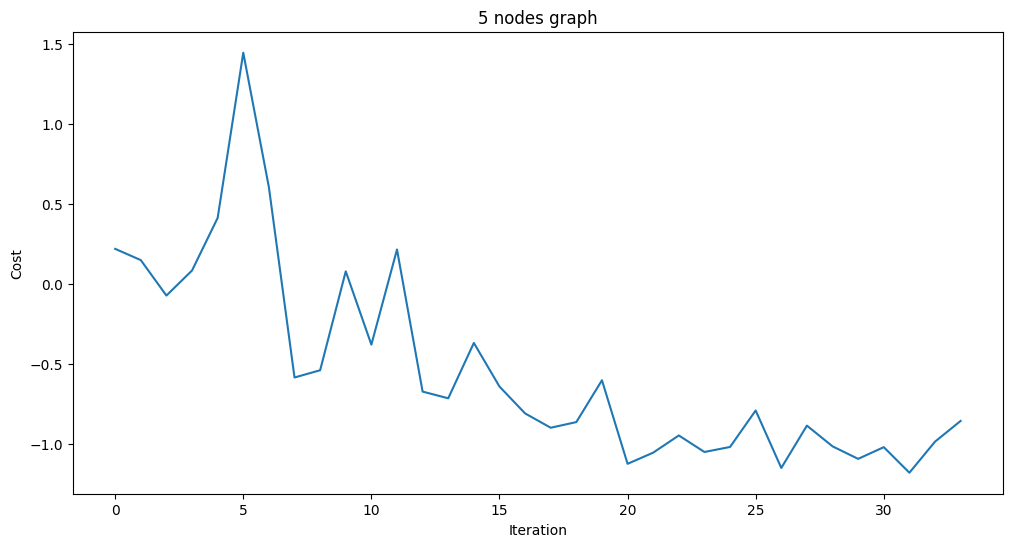

In [77]:
plt.figure(figsize=(12, 6))
plt.title("5 nodes graph")
plt.plot(objective_func_vals5)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

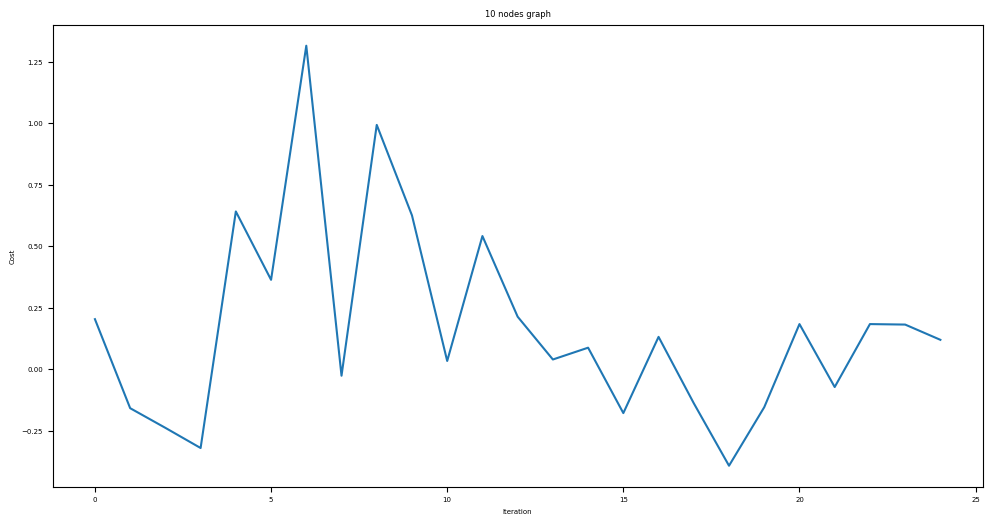

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("10 nodes graph")
plt.plot(objective_func_vals10)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

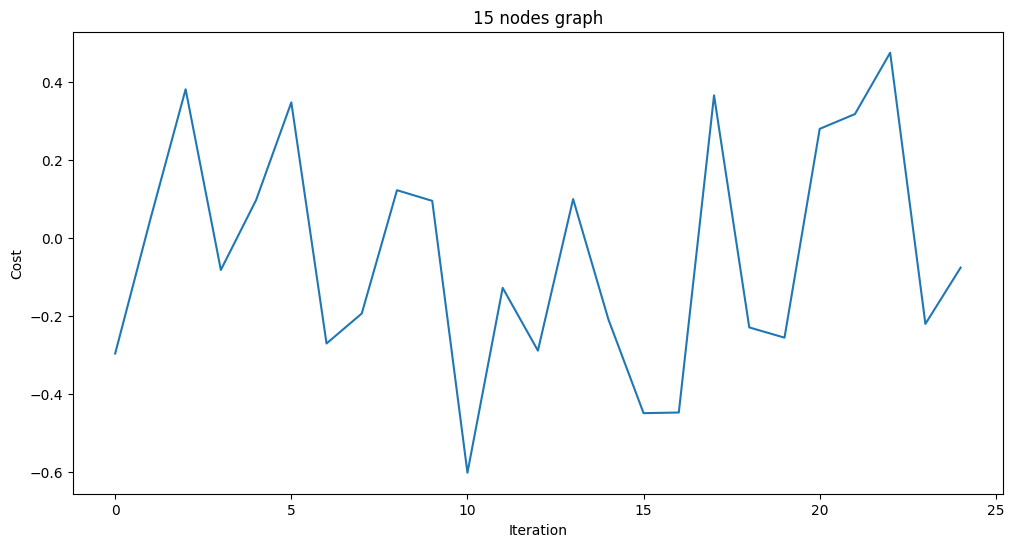

In [17]:
plt.figure(figsize=(12, 6))
plt.title("15 nodes graph")
plt.plot(objective_func_vals15)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

#### Simulator outputs

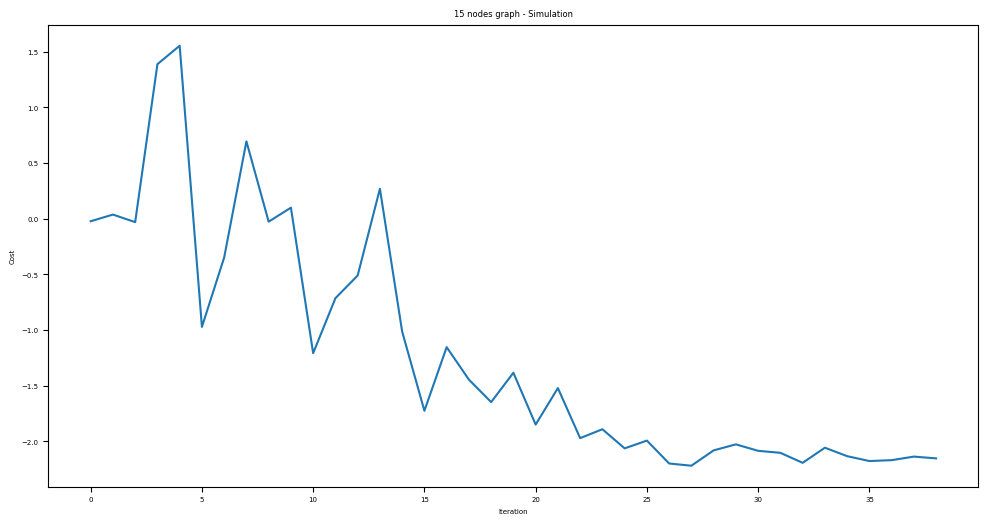

In [144]:
plt.figure(figsize=(12, 6))
plt.title("15 nodes graph - Simulation")
plt.plot(sim_objective_func_vals5)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

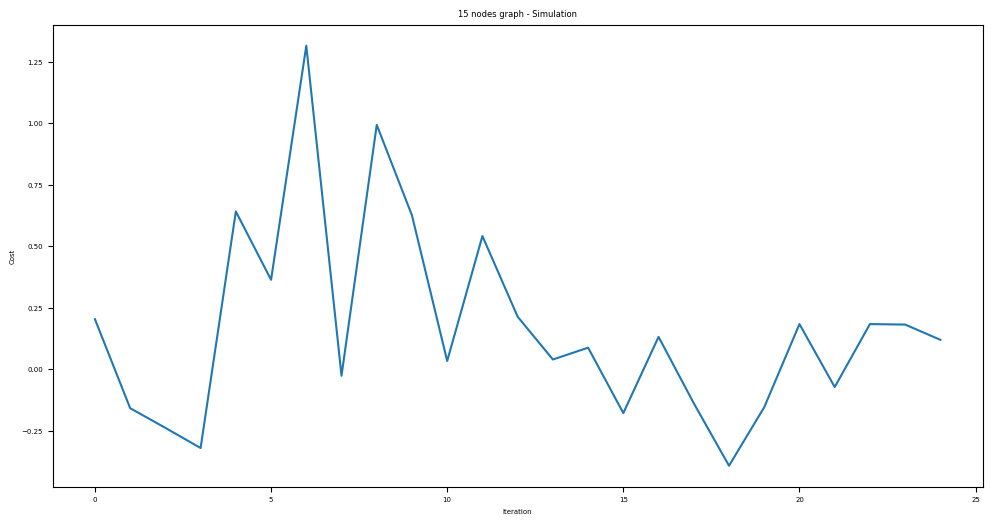

In [145]:
plt.figure(figsize=(12, 6))
plt.title("15 nodes graph - Simulation")
plt.plot(sim_objective_func_vals10)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

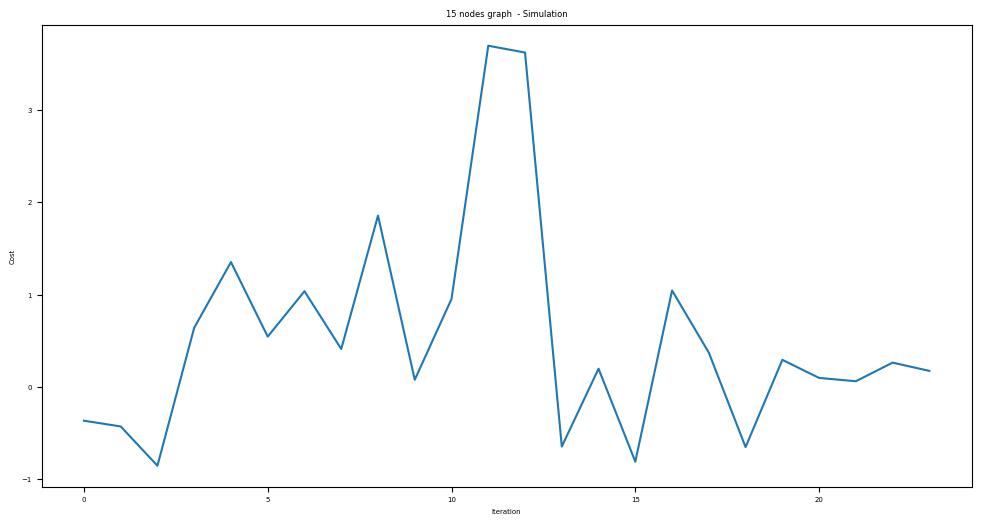

In [146]:
plt.figure(figsize=(12, 6))
plt.title("15 nodes graph  - Simulation")
plt.plot(sim_objective_func_vals15)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

### Sampling Max-cut solutions from optimized circuit

#### Real Machine run

In [ ]:
optimized_circuit5 = candidate_circuit5.assign_parameters(result1.x)
session1 = Session(backend=backend5)
sampler1 = Sampler(mode=session1)
sampler1.options.default_shots = 10000

# Set simple error suppression/mitigation options
sampler1.options.dynamical_decoupling.enable = True
sampler1.options.dynamical_decoupling.sequence_type = "XY4"
sampler1.options.twirling.enable_gates = True
sampler1.options.twirling.num_randomizations = "auto"

pub= (optimized_circuit5, )
job5 = sampler1.run([pub], shots=int(1e4))
session1.close()
counts_int = job5.result()[0].data.meas.get_int_counts()
counts_bin = job5.result()[0].data.meas.get_counts()
shots = sum(counts_int.values())
final_distribution_int5 = {key: val/shots for key, val in counts_int.items()}
final_distribution_bin5 = {key: val/shots for key, val in counts_bin.items()}
print(final_distribution_int5)

{3: 0.0281, 11: 0.0498, 19: 0.0455, 7: 0.0196, 2: 0.026, 31: 0.0122, 20: 0.0449, 18: 0.0338, 17: 0.0462, 0: 0.0132, 22: 0.0447, 24: 0.0235, 25: 0.0233, 4: 0.0179, 16: 0.0229, 28: 0.0223, 26: 0.0516, 5: 0.0553, 12: 0.0418, 23: 0.0213, 10: 0.041, 13: 0.0382, 27: 0.0212, 21: 0.0397, 9: 0.0581, 14: 0.0311, 1: 0.0189, 8: 0.0248, 30: 0.0171, 15: 0.0167, 29: 0.0319, 6: 0.0174}


/tmp/ipykernel_28297/1826480466.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.get_children()[int(p)].set_color("tab:purple")


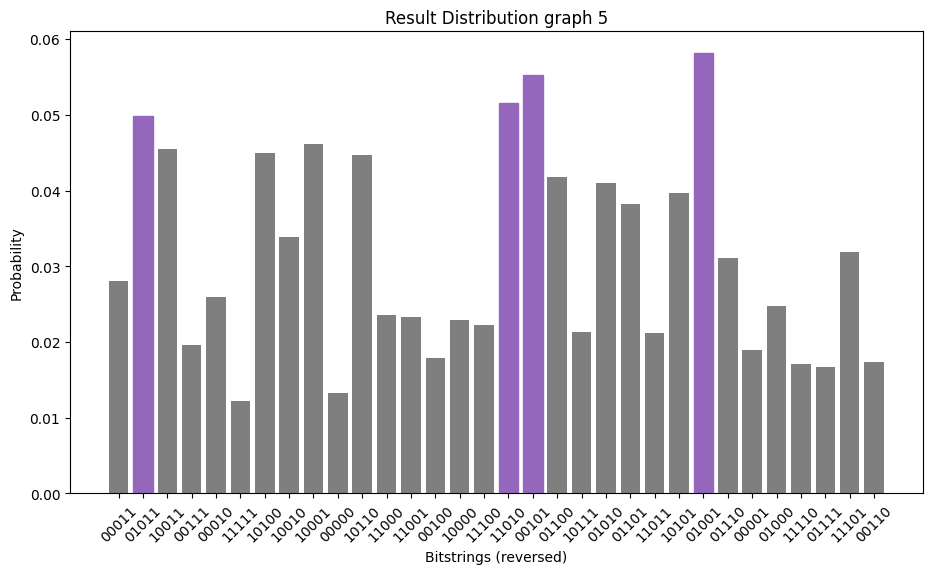

In [87]:
matplotlib.rcParams.update({"font.size": 10})
final_bits = final_distribution_bin5
values = np.abs(list(final_bits.values()))
top_4_values = sorted(values, reverse=True)[:4]
positions = []
for value in top_4_values:
    positions.append(np.where(values == value)[0])
fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot(1, 1, 1)
plt.xticks(rotation=45)
plt.title("Result Distribution graph 5")
plt.xlabel("Bitstrings (reversed)")
plt.ylabel("Probability")
ax.bar(list(final_bits.keys()), list(final_bits.values()), color="tab:grey")
for p in positions:
    ax.get_children()[int(p)].set_color("tab:purple")
plt.show()

In [128]:
optimized_circuit10 = candidate_circuit10.assign_parameters(result2.x)
session2 = Session(backend=backend10)
sampler2 = Sampler(mode=session2)
sampler2.options.default_shots = 10000

# Set simple error suppression/mitigation options
sampler2.options.dynamical_decoupling.enable = True
sampler2.options.dynamical_decoupling.sequence_type = "XY4"
sampler2.options.twirling.enable_gates = True
sampler2.options.twirling.num_randomizations = "auto"

pub= (optimized_circuit10, )
job10 = sampler2.run([pub], shots=int(1e4))
session2.close()
counts_int = job10.result()[0].data.meas.get_int_counts()
counts_bin = job10.result()[0].data.meas.get_counts()
shots = sum(counts_int.values())
final_distribution_int10 = {key: val/shots for key, val in counts_int.items()}
final_distribution_bin10 = {key: val/shots for key, val in counts_bin.items()}
print(final_distribution_int10)

{791: 0.0018, 490: 0.0013, 723: 0.0011, 918: 0.0011, 364: 0.0007, 389: 0.0012, 615: 0.0017, 39: 0.0018, 199: 0.0015, 329: 0.0013, 138: 0.001, 501: 0.0015, 148: 0.0006, 888: 0.0008, 270: 0.0012, 192: 0.001, 201: 0.0006, 511: 0.0011, 334: 0.0009, 997: 0.0012, 146: 0.0014, 461: 0.0006, 735: 0.0011, 234: 0.0011, 969: 0.0009, 486: 0.0009, 1005: 0.0009, 727: 0.0012, 27: 0.0013, 88: 0.0015, 419: 0.0011, 762: 0.001, 351: 0.0014, 853: 0.0012, 489: 0.0009, 813: 0.0006, 217: 0.0013, 712: 0.0003, 206: 0.0015, 300: 0.0007, 356: 0.0011, 945: 0.001, 127: 0.0013, 698: 0.0016, 512: 0.0004, 46: 0.0003, 821: 0.0005, 1017: 0.0009, 131: 0.0007, 327: 0.0017, 614: 0.0008, 823: 0.0015, 822: 0.0006, 412: 0.0011, 133: 0.0009, 711: 0.0013, 410: 0.0008, 187: 0.0011, 167: 0.0013, 202: 0.0009, 87: 0.0016, 678: 0.0013, 450: 0.0013, 244: 0.001, 610: 0.0013, 239: 0.0013, 215: 0.0012, 172: 0.0012, 630: 0.001, 322: 0.001, 939: 0.0016, 627: 0.0008, 498: 0.0005, 154: 0.0011, 153: 0.0013, 745: 0.0009, 666: 0.0008, 169: 0.0

TypeError: only length-1 arrays can be converted to Python scalars

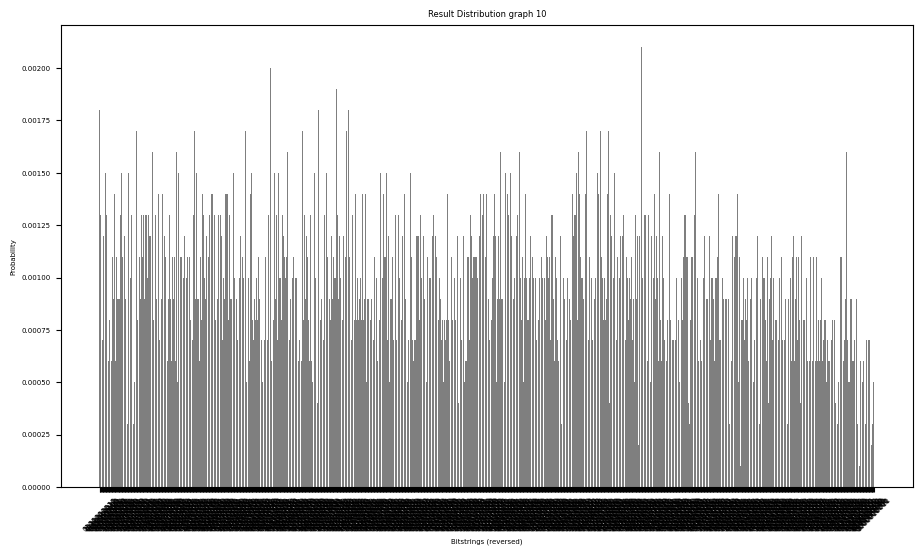

In [ ]:
matplotlib.rcParams.update({"font.size": 10})
final_bits = final_distribution_bin10
values = np.abs(list(final_bits.values()))
top_4_values = sorted(values, reverse=True)[:4]
positions = []
for value in top_4_values:
    positions.append(np.where(values == value)[0])
fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot(1, 1, 1)
plt.xticks(rotation=45)
plt.title("Result Distribution graph 10")
plt.xlabel("Bitstrings (reversed)")
plt.ylabel("Probability")
ax.bar(list(final_bits.keys()), list(final_bits.values()), color="tab:grey")
for p in positions:
    ax.get_children()[int(p)].set_color("tab:purple")
plt.show()

In [18]:
optimized_circuit15 = candidate_circuit15.assign_parameters(result3.x)
session3 = Session(backend=backend15)
sampler3 = Sampler(mode=session3)
sampler3.options.default_shots = 10000

# Set simple error suppression/mitigation options
sampler3.options.dynamical_decoupling.enable = True
sampler3.options.dynamical_decoupling.sequence_type = "XY4"
sampler3.options.twirling.enable_gates = True
sampler3.options.twirling.num_randomizations = "auto"

pub= (optimized_circuit15, )
job15 = sampler3.run([pub], shots=int(1e4))
session3.close()
counts_int = job15.result()[0].data.meas.get_int_counts()
counts_bin = job15.result()[0].data.meas.get_counts()
shots = sum(counts_int.values())
final_distribution_int15 = {key: val/shots for key, val in counts_int.items()}
final_distribution_bin15 = {key: val/shots for key, val in counts_bin.items()}
print(final_distribution_int15)

{32523: 0.0003, 4460: 0.0001, 11128: 0.0001, 15493: 0.0001, 3134: 0.0001, 21502: 0.0001, 25399: 0.0001, 9382: 0.0001, 7809: 0.0001, 14585: 0.0002, 1955: 0.0001, 21933: 0.0001, 14293: 0.0001, 25809: 0.0002, 20739: 0.0002, 11859: 0.0002, 7799: 0.0002, 29684: 0.0001, 26458: 0.0002, 32344: 0.0001, 3443: 0.0001, 25921: 0.0001, 1736: 0.0001, 26788: 0.0002, 5674: 0.0002, 27205: 0.0001, 2033: 0.0001, 26684: 0.0001, 3748: 0.0002, 24244: 0.0001, 9449: 0.0003, 22620: 0.0001, 5448: 0.0001, 3129: 0.0001, 1924: 0.0001, 1928: 0.0002, 21128: 0.0001, 28595: 0.0002, 11775: 0.0002, 19034: 0.0003, 20301: 0.0001, 32171: 0.0002, 20463: 0.0003, 5023: 0.0001, 18261: 0.0001, 31931: 0.0001, 8999: 0.0001, 31637: 0.0001, 30878: 0.0001, 4800: 0.0001, 22053: 0.0001, 25069: 0.0001, 17610: 0.0001, 15232: 0.0002, 11277: 0.0001, 19163: 0.0002, 16531: 0.0001, 15094: 0.0001, 11982: 0.0001, 27809: 0.0001, 1007: 0.0002, 2103: 0.0001, 5606: 0.0001, 3414: 0.0001, 26962: 0.0001, 3581: 0.0001, 9513: 0.0001, 10134: 0.0001, 2493

TypeError: only length-1 arrays can be converted to Python scalars

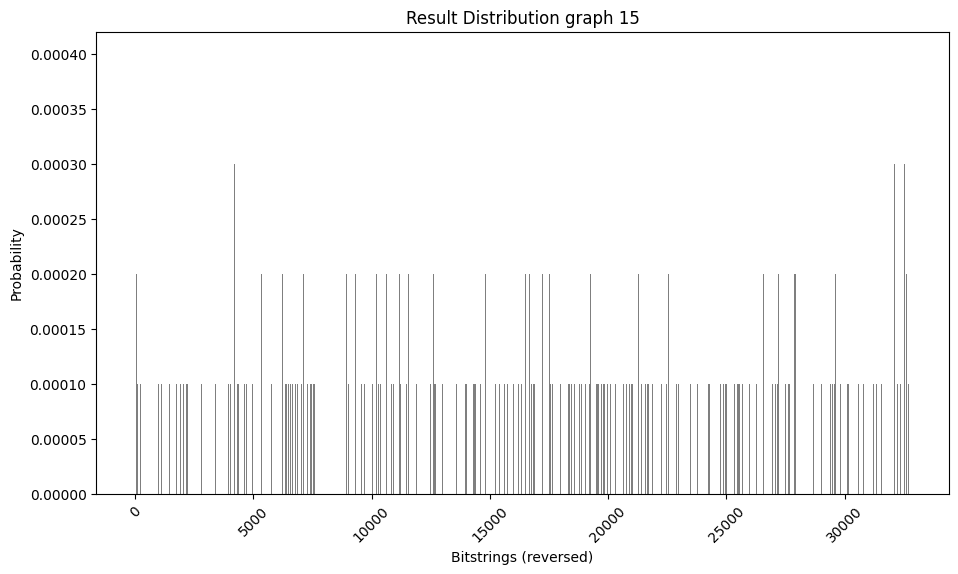

In [19]:
matplotlib.rcParams.update({"font.size": 10})
final_bits = final_distribution_int15
values = np.abs(list(final_bits.values()))
top_4_values = sorted(values, reverse=True)[:4]
positions = []
for value in top_4_values:
    positions.append(np.where(values == value)[0])
fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot(1, 1, 1)
plt.xticks(rotation=45)
plt.title("Result Distribution graph 15")
plt.xlabel("Bitstrings (reversed)")
plt.ylabel("Probability")
ax.bar(list(final_bits.keys()), list(final_bits.values()), color="tab:grey")
for p in positions:
    ax.get_children()[int(p)].set_color("tab:purple")
plt.show()

#### Simulator run

In [147]:
sim_optimized_circuit5 = sim_candidate_circuit5.assign_parameters(sim_result1.x)
sim_sampler1 = Sampler(mode=sim_backend5)
sim_sampler1.options.default_shots = 10000

pub= (sim_optimized_circuit5, )
sim_job5 = sim_sampler1.run([pub], shots=int(1e4))
counts_int = sim_job5.result()[0].data.meas.get_int_counts()
counts_bin = sim_job5.result()[0].data.meas.get_counts()
shots = sum(counts_int.values())
sim_final_distribution_int5 = {key: val/shots for key, val in counts_int.items()}
sim_final_distribution_bin5 = {key: val/shots for key, val in counts_bin.items()}
print(sim_final_distribution_int5)

{9: 0.1146, 31: 0.0075, 11: 0.1161, 0: 0.0071, 5: 0.0395, 17: 0.0152, 22: 0.121, 21: 0.051, 10: 0.0485, 14: 0.0145, 8: 0.0129, 12: 0.0175, 20: 0.1233, 13: 0.0437, 1: 0.0114, 19: 0.0133, 18: 0.0426, 27: 0.0169, 26: 0.0387, 23: 0.0129, 29: 0.0138, 15: 0.0081, 25: 0.0096, 16: 0.0098, 30: 0.0127, 24: 0.012, 2: 0.0149, 3: 0.0082, 6: 0.0088, 7: 0.013, 4: 0.0161, 28: 0.0048}


/tmp/ipykernel_28297/10558154.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.get_children()[int(p)].set_color("tab:purple")


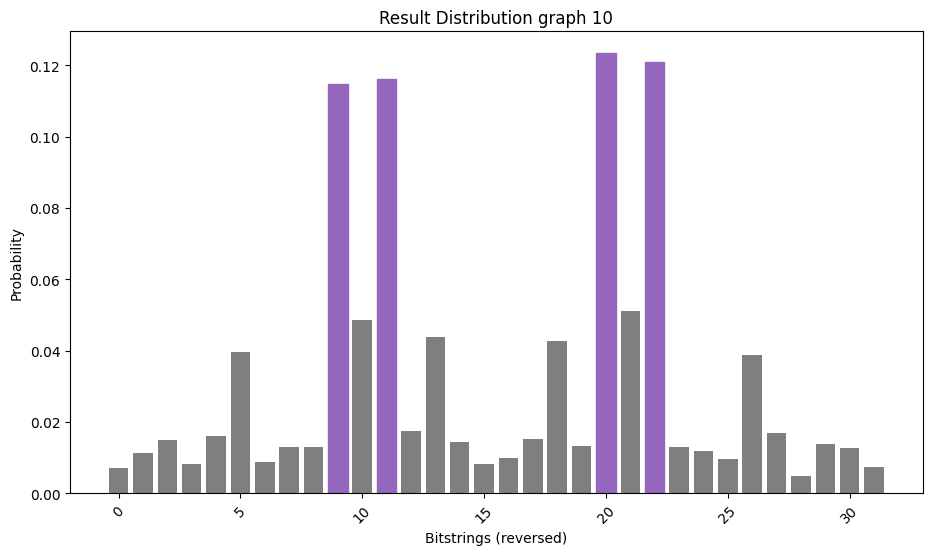

In [ ]:
matplotlib.rcParams.update({"font.size": 10})
final_bits = sim_final_distribution_int5
values = np.abs(list(final_bits.values()))
top_4_values = sorted(values, reverse=True)[:4]
positions = []
for value in top_4_values:
    positions.append(np.where(values == value)[0])
fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot(1, 1, 1)
plt.xticks(rotation=45)
plt.title("Result Distribution graph 5")
plt.xlabel("Bitstrings (reversed)")
plt.ylabel("Probability")
ax.bar(list(final_bits.keys()), list(final_bits.values()), color="tab:grey")
for p in positions:
    ax.get_children()[int(p)].set_color("tab:purple")
plt.show()

In [148]:
sim_optimized_circuit10 = sim_candidate_circuit5.assign_parameters(sim_result2.x)
sim_sampler2 = Sampler(mode=sim_backend10)
sim_sampler2.options.default_shots = 10000

pub= (sim_optimized_circuit10, )
sim_job10 = sim_sampler2.run([pub], shots=int(1e4))
counts_int = sim_job10.result()[0].data.meas.get_int_counts()
counts_bin = sim_job10.result()[0].data.meas.get_counts()
shots = sum(counts_int.values())
sim_final_distribution_int10 = {key: val/shots for key, val in counts_int.items()}
sim_final_distribution_bin10 = {key: val/shots for key, val in counts_bin.items()}
print(sim_final_distribution_int10)

{3: 0.0174, 30: 0.0177, 12: 0.0568, 17: 0.0587, 7: 0.0257, 6: 0.0125, 24: 0.0235, 18: 0.0195, 5: 0.0117, 19: 0.0632, 16: 0.0443, 20: 0.0343, 11: 0.0365, 9: 0.033, 8: 0.039, 31: 0.0656, 10: 0.0183, 14: 0.057, 13: 0.0224, 15: 0.0457, 29: 0.028, 27: 0.0145, 23: 0.0375, 4: 0.0162, 22: 0.0331, 0: 0.0619, 28: 0.0181, 1: 0.0172, 25: 0.0136, 21: 0.0197, 2: 0.0262, 26: 0.0112}


/tmp/ipykernel_28297/2840388008.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.get_children()[int(p)].set_color("tab:purple")


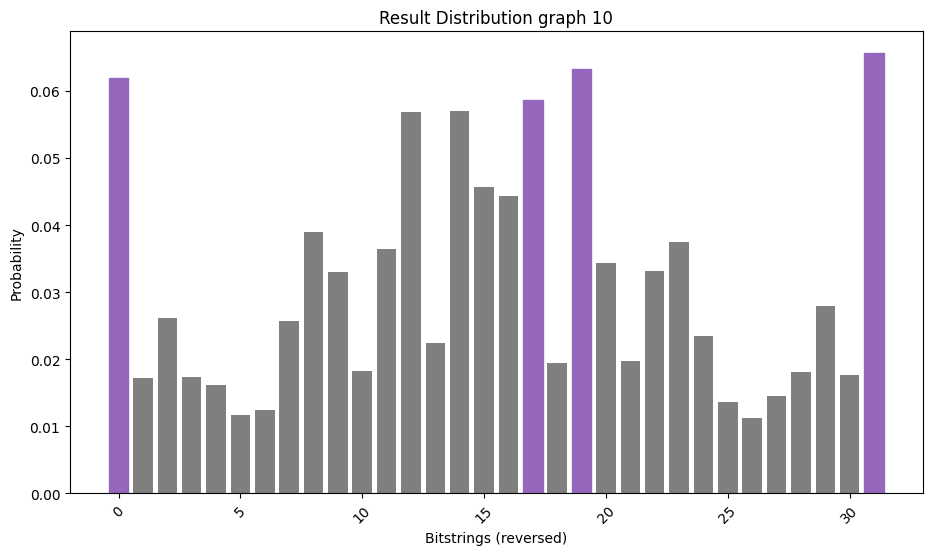

In [151]:
matplotlib.rcParams.update({"font.size": 10})
final_bits = sim_final_distribution_int10
values = np.abs(list(final_bits.values()))
top_4_values = sorted(values, reverse=True)[:4]
positions = []
for value in top_4_values:
    positions.append(np.where(values == value)[0])
fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot(1, 1, 1)
plt.xticks(rotation=45)
plt.title("Result Distribution graph 10")
plt.xlabel("Bitstrings (reversed)")
plt.ylabel("Probability")
ax.bar(list(final_bits.keys()), list(final_bits.values()), color="tab:grey")
for p in positions:
    ax.get_children()[int(p)].set_color("tab:purple")
plt.show()

In [149]:
sim_optimized_circuit15 = sim_candidate_circuit15.assign_parameters(sim_result3.x)
sim_sampler3 = Sampler(mode=sim_backend15)
sim_sampler3.options.default_shots = 10000

pub= (sim_optimized_circuit15, )
sim_job15 = sim_sampler3.run([pub], shots=int(1e4))
counts_int = sim_job15.result()[0].data.meas.get_int_counts()
counts_bin = sim_job15.result()[0].data.meas.get_counts()
shots = sum(counts_int.values())
sim_final_distribution_int15 = {key: val/shots for key, val in counts_int.items()}
sim_final_distribution_bin15 = {key: val/shots for key, val in counts_bin.items()}
print(sim_final_distribution_int15)

{26370: 0.0001, 17193: 0.0001, 19342: 0.0001, 11591: 0.0001, 16187: 0.0001, 22512: 0.0001, 30928: 0.0002, 15284: 0.0003, 10637: 0.0001, 6868: 0.0002, 19402: 0.0001, 5779: 0.0003, 19135: 0.0001, 22733: 0.0001, 21115: 0.0001, 26237: 0.0001, 28339: 0.0001, 13578: 0.0002, 28962: 0.0001, 31674: 0.0002, 2025: 0.0001, 27259: 0.0001, 12783: 0.0001, 22393: 0.0001, 12071: 0.0001, 27932: 0.0001, 21886: 0.0002, 26239: 0.0002, 6744: 0.0002, 26238: 0.0001, 8559: 0.0001, 13802: 0.0001, 3600: 0.0001, 2820: 0.0001, 1980: 0.0001, 7476: 0.0002, 22169: 0.0001, 12248: 0.0003, 15412: 0.0001, 9644: 0.0002, 31534: 0.0002, 22681: 0.0002, 27639: 0.0001, 3166: 0.0002, 7073: 0.0001, 8093: 0.0002, 14398: 0.0001, 7267: 0.0002, 25927: 0.0001, 12938: 0.0001, 6501: 0.0001, 31838: 0.0001, 27966: 0.0001, 8005: 0.0001, 3627: 0.0001, 6035: 0.0001, 29288: 0.0001, 14131: 0.0002, 26632: 0.0001, 29935: 0.0001, 3839: 0.0002, 24610: 0.0001, 26158: 0.0001, 31215: 0.0001, 17684: 0.0001, 16416: 0.0001, 21999: 0.0001, 28055: 0.0002

/tmp/ipykernel_28297/3086748664.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.get_children()[int(p)].set_color("tab:purple")


TypeError: only length-1 arrays can be converted to Python scalars

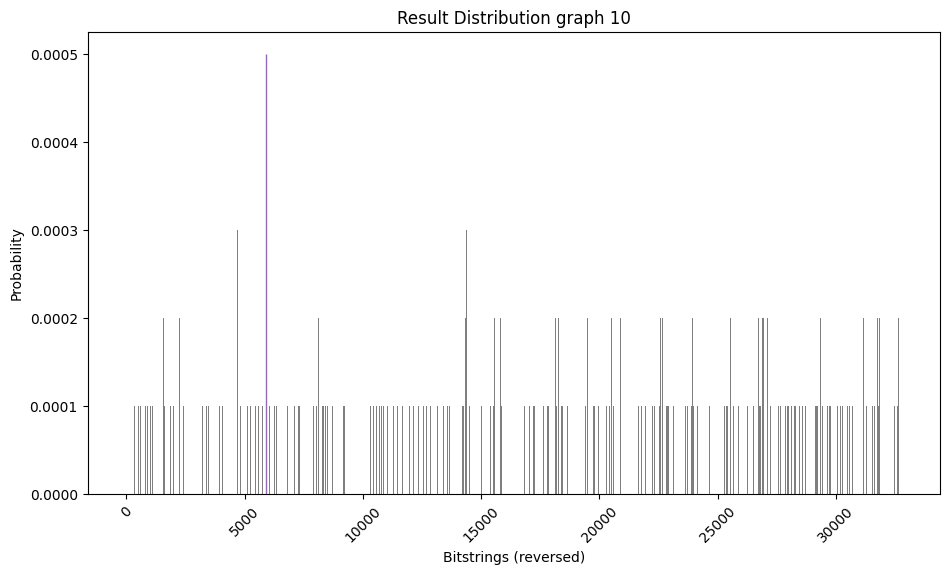

In [ ]:
matplotlib.rcParams.update({"font.size": 10})
final_bits = sim_final_distribution_int15
values = np.abs(list(final_bits.values()))
top_4_values = sorted(values, reverse=True)[:4]
positions = []
for value in top_4_values:
    positions.append(np.where(values == value)[0])
fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot(1, 1, 1)
plt.xticks(rotation=45)
plt.title("Result Distribution graph 15")
plt.xlabel("Bitstrings (reversed)")
plt.ylabel("Probability")
ax.bar(list(final_bits.keys()), list(final_bits.values()), color="tab:grey")
for p in positions:
    ax.get_children()[int(p)].set_color("tab:purple")
plt.show()

### Returning result in classical format

#### From real machines

In [20]:
def to_bitstring(integer, num_bits):    # auxiliary functions to sample most likely bitstring
    result = np.binary_repr(integer, width=num_bits)
    return [int(digit) for digit in result]

In [ ]:
keys = list(final_distribution_int5.keys())
values = list(final_distribution_int5.values())
most_likely = keys[np.argmax(np.abs(values))]
most_likely_bitstring5 = to_bitstring(most_likely, len(graph5))
most_likely_bitstring5.reverse()

print("Result bitstring:", most_likely_bitstring5)

Result bitstring: [1, 0, 0, 1, 0]


In [132]:
keys = list(final_distribution_int10.keys())
values = list(final_distribution_int10.values())
most_likely = keys[np.argmax(np.abs(values))]
most_likely_bitstring10 = to_bitstring(most_likely, len(graph10))
most_likely_bitstring10.reverse()

print("Result bitstring:", most_likely_bitstring10)

Result bitstring: [1, 1, 1, 0, 1, 0, 0, 0, 0, 0]


In [21]:
keys = list(final_distribution_int15.keys())
values = list(final_distribution_int15.values())
most_likely = keys[np.argmax(np.abs(values))]
most_likely_bitstring15 = to_bitstring(most_likely, len(graph15))
most_likely_bitstring15.reverse()

print("Result bitstring:", most_likely_bitstring15)

Result bitstring: [1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0]


#### From simulators

In [153]:
keys = list(sim_final_distribution_int5.keys())
values = list(sim_final_distribution_int5.values())
sim_most_likely = keys[np.argmax(np.abs(values))]
sim_most_likely_bitstring5 = to_bitstring(sim_most_likely, len(graph5))
sim_most_likely_bitstring5.reverse()

print("Result bitstring:", sim_most_likely_bitstring5)

Result bitstring: [0, 0, 1, 0, 1]


In [154]:
keys = list(sim_final_distribution_int10.keys())
values = list(sim_final_distribution_int10.values())
sim_most_likely = keys[np.argmax(np.abs(values))]
sim_most_likely_bitstring10 = to_bitstring(sim_most_likely, len(graph10))
sim_most_likely_bitstring10.reverse()

print("Result bitstring:", sim_most_likely_bitstring10)

Result bitstring: [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


In [155]:
keys = list(sim_final_distribution_int15.keys())
values = list(sim_final_distribution_int15.values())
sim_most_likely = keys[np.argmax(np.abs(values))]
sim_most_likely_bitstring15 = to_bitstring(sim_most_likely, len(graph15))
sim_most_likely_bitstring15.reverse()

print("Result bitstring:", sim_most_likely_bitstring15)

Result bitstring: [1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0]


### Visualizing Max-cut in graph

#### From Real machine outputs

In [22]:
# auxiliary function to plot graphs
def plot_result(G, x):
    colors = ["tab:grey" if i == 0 else "tab:purple" for i in x]
    pos, default_axes = rx.spring_layout(G), plt.axes(frameon=True)
    rx.visualization.mpl_draw(G, node_color=colors, node_size=100, alpha=0.8, pos=pos)

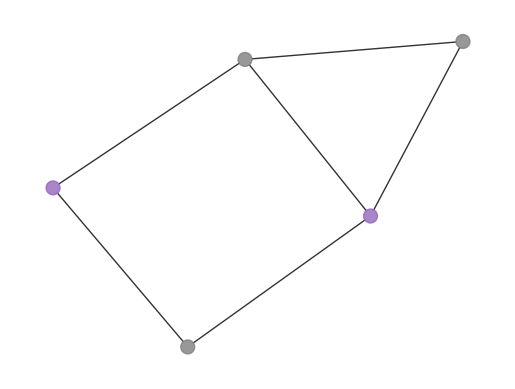

In [ ]:
# visualizing cut
plot_result(graph5, most_likely_bitstring5)

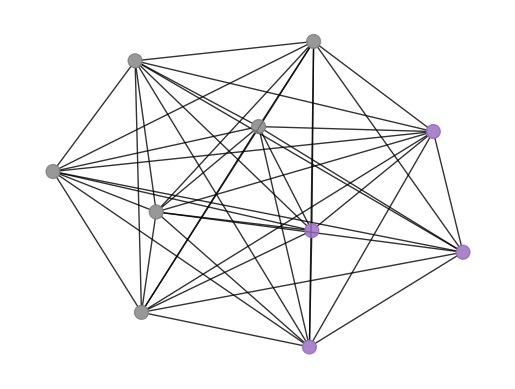

In [133]:
# visualizing cut
plot_result(graph10, most_likely_bitstring10)

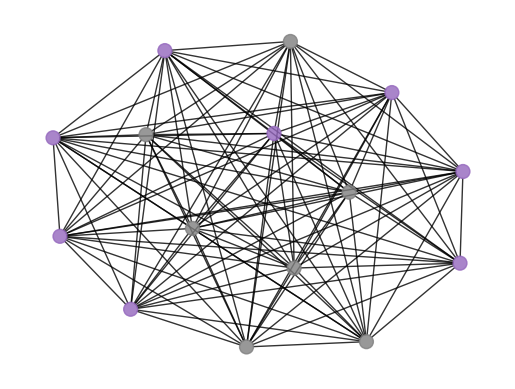

In [23]:
# visualizing cut
plot_result(graph15, most_likely_bitstring15)

#### From simulators output

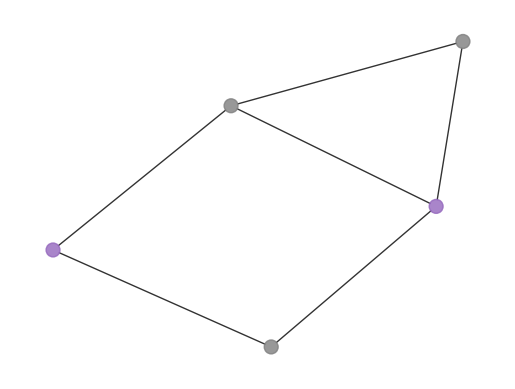

In [156]:
# visualizing cut
plot_result(graph5, sim_most_likely_bitstring5)

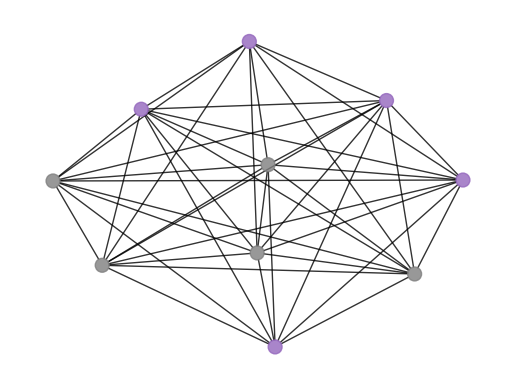

In [157]:
# visualizing cut
plot_result(graph10, sim_most_likely_bitstring10)

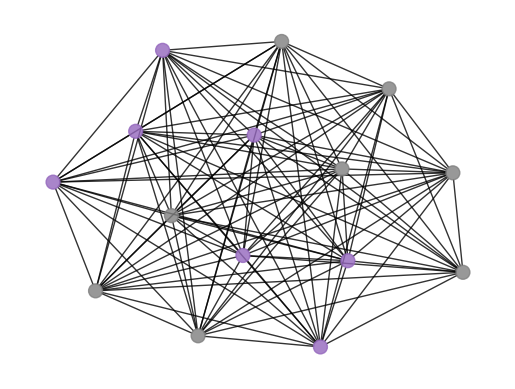

In [158]:
# visualizing cut
plot_result(graph15, sim_most_likely_bitstring15)

## Calculating value of Cut

In [24]:
def evaluate_sample(x: Sequence[int], graph: rx.PyGraph) -> float:
    assert len(x) == len(list(graph.nodes())), "The length of x must coincide with the number of nodes in the graph."
    return sum(x[u-1] * (1 - x[v-1]) + x[v-1] * (1 - x[u-1]) for u, v in list(graph.edge_list()))

#### For Real Machines output

In [ ]:
cut_value5= evaluate_sample(most_likely_bitstring5, graph5)
print('The value of the cut of graph of 5 nodes is:', cut_value5)

The value of the cut of graph of 5 nodes is: 5


In [134]:
cut_value10= evaluate_sample(most_likely_bitstring10, graph10)
print('The value of the cut of the graph with 10 nodes is:', cut_value10)

The value of the cut of the graph with 10 nodes is: 24


In [25]:
cut_value15= evaluate_sample(most_likely_bitstring15, graph15)
print('The value of the cut of the graph with 15 nodes is:', cut_value15)

The value of the cut of the graph with 15 nodes is: 55


#### From Simulator output

In [159]:
sim_cut_value5= evaluate_sample(sim_most_likely_bitstring5, graph5)
print('The value of the cut of the graph with 5 nodes is:', sim_cut_value5)

The value of the cut of the graph with 5 nodes is: 5


In [160]:
sim_cut_value10= evaluate_sample(sim_most_likely_bitstring10, graph10)
print('The value of the cut of the graph with 10 nodes is:', sim_cut_value10)

The value of the cut of the graph with 10 nodes is: 25


In [161]:
sim_cut_value15= evaluate_sample(sim_most_likely_bitstring15, graph15)
print('The value of the cut of the graph with 15 nodes is:', sim_cut_value15)

The value of the cut of the graph with 15 nodes is: 55


## Quality of answer

#### Real machine answers

In [ ]:
Q = ( ( ((cut_value5-5)/5)**2 + ((cut_value10-25)/25)**2 + ((cut_value15-56)/56)**2 )/3 )**0.5
success_rate = (1-Q)*100
print("success rate:", success_rate,"%")

success rate: 97.47091745816762 %


#### Simulator answers

In [177]:
sim_Q = ( ( ((sim_cut_value5-5)/5)**2 + ((sim_cut_value10-25)/25)**2 + ((sim_cut_value15-56)/56)**2 ) /3 )**0.5
sim_success_rate = (1-sim_Q)*100
print("success rate:", sim_success_rate,"%")

success rate: 98.9690173764471 %


# Summarising results
| Algorithm | Time(5 nodes) | Time(10 nodes) | Time(15 nodes) | Success Rate |
| :-------: | :------------: | :------------: | :-------------: | :----------: |
| Clasical  |   34 us          |      3.09 ms       |     225ms         |   100%       |
|   QAOA    |   364.02 s          |      436 s       |     443 s         |   97.47%        |
|   QAOA(simulator) |   96 s |   218 s |   2158.3 s |   98.96% |
|   Optimal |   34 us          |      3.09 ms       |     225 ms         |   100%        |